# FINAL PROPOSAL _ WORLD HAPPINESS INDEX  

###  The art behind happiness has been revealed through amazing visualization. The picture of world happiness, impact factor for increased happiness score and region based happiness investigation will show a interesting scenerio of this dataset.

### The increasing number of experts start to use the measurements of well-being can be used effectively to assess the progress of nations.
1.	What aspects will impact the happiness rate？ how to get happiness?
2.	Which region and country have the highest happiness rate? 
3.	At last, the Happiness index of 2018 will be predicted. 


### IMPORT DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec


In [2]:
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
from matplotlib import animation,rc

In [3]:
import types
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

In [4]:
import seaborn as sns
sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()
df = pd.read_csv("2017.csv")
df.head()

,Country,Region,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy,Family,Health,Freedom,Generosity,Trust,Dystopia
0,Norway,Western Europe,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Western Europe,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,Western Europe,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,Western Europe,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,Western Europe,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


### BASIC ANALYSIS

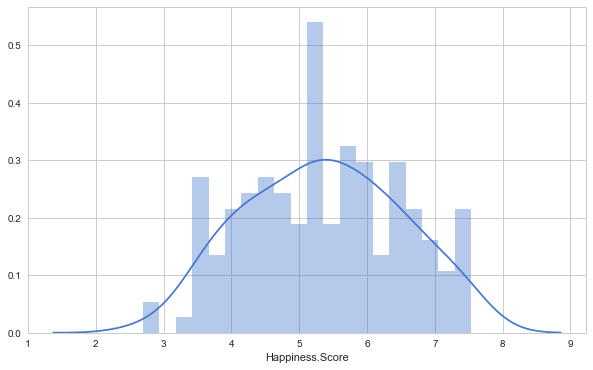

In [5]:
plt.figure(figsize=(10,6))
sns.distplot(df['Happiness.Score'],kde=True, bins = 20)
plt.show()

In [6]:
# from this graph, higher happiness index range from 4.5 to 6
# no happiness index of any country at 0 - 2.5 and 7.5 - 9
# SO, HOW ABOUT THE REGIONAL HAPPINESS INDEX?

### STUDY OF REGIONAL HAPPINESS INDEX

In [7]:
df.groupby('Region')['Happiness.Rank', 'Happiness.Score', 'Economy', 'Family','Health', 'Freedom', 'Generosity', 'Trust', 'Dystopia'].mean().sort_values(by="Happiness.Score", ascending=False)

,Happiness.Rank,Happiness.Score,Economy,Family,Health,Freedom,Generosity,Trust,Dystopia
Region,,,,,,,,,
Australia and New Zealand,9.000000,7.299000,1.445060,1.529119,0.830323,0.607835,0.488852,0.342000,2.055834
North America,10.500000,7.154500,1.512732,1.450635,0.804422,0.558421,0.414059,0.211505,2.202689
Western Europe,27.142857,6.703714,1.457411,1.444946,0.824673,0.515125,0.303497,0.218999,1.939043
central and Eastern Europe,46.000000,5.973000,1.291788,1.445712,0.699475,0.520342,0.158466,0.059308,1.797723
Latin America and Caribbean,50.809524,5.957905,1.011695,1.300096,0.618667,0.444541,0.209300,0.087344,2.286212
Eastern Asia,64.833333,5.646667,1.318716,1.310970,0.808323,0.413819,0.221224,0.106750,1.466846
Southeastern Asia,65.857143,5.627286,1.017180,1.284763,0.603652,0.520913,0.458994,0.136089,1.605716
Central and Eastern Europe,76.107143,5.389821,1.084918,1.276449,0.633826,0.340404,0.187104,0.080345,1.786751
Middle East and Northern Africa,79.950000,5.280750,1.129971,1.070802,0.583855,0.352933,0.203497,0.147470,1.792197


In [8]:
# Australia and New Zealand ranked first and Sub-saharan Africa ranked last

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

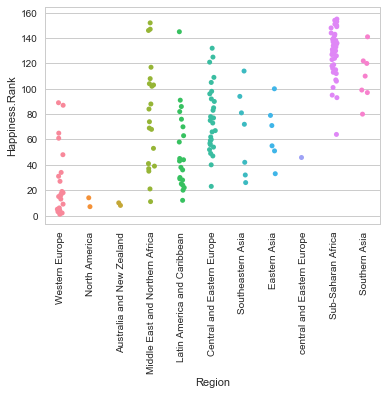

In [9]:
g = sns.stripplot(x="Region", y="Happiness.Rank", data=df, jitter=True)
plt.xticks(rotation=90)

In [10]:
# to be more specfic, most countries in Western Europe have a good rank
# but middle East and Northern Africa and Central and Eastern Europe distributed evenly

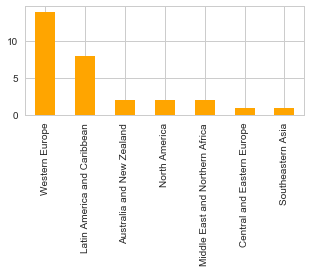

In [11]:
plt.figure(figsize=(5,2))
list1 = df.sort_values(by=['Happiness.Rank'],ascending=True)['Region'].head(30).value_counts()
list1.plot(kind = 'bar', color = 'orange')

In [12]:
# this graph showed the top 30 country located in which region
# Western Europe listed most. Southern asia least counts.
# THEN, I WILL COMPARE EUROPE AND ASIA FROM DIFFERENT ASPECTS

### COMPARED WITH DIFFERENT REGIONS

#### Europe

In [13]:
w_europe = df[df.Region=='Western Europe']
ec_europe = df[df.Region=='Central and Eastern Europe']
europe = pd.concat([w_europe,ec_europe],axis=0)
europe.head()

,Country,Region,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy,Family,Health,Freedom,Generosity,Trust,Dystopia
0,Norway,Western Europe,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Western Europe,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,Western Europe,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,Western Europe,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,Western Europe,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


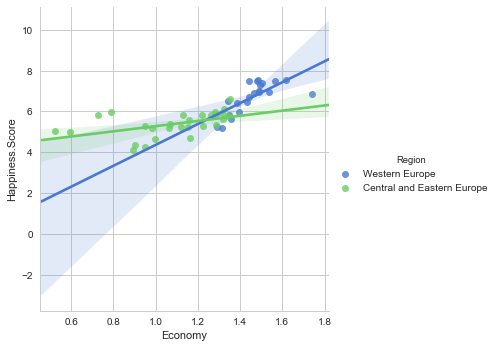

In [14]:
plt.figure(figsize=(12,6))
sns.lmplot(data=europe, x='Economy', y='Happiness.Score', hue="Region")
plt.show()

In [15]:
# the blue dote represent countries in Western Europe.
# Western Europe is happier than Central and Eastern Europe.

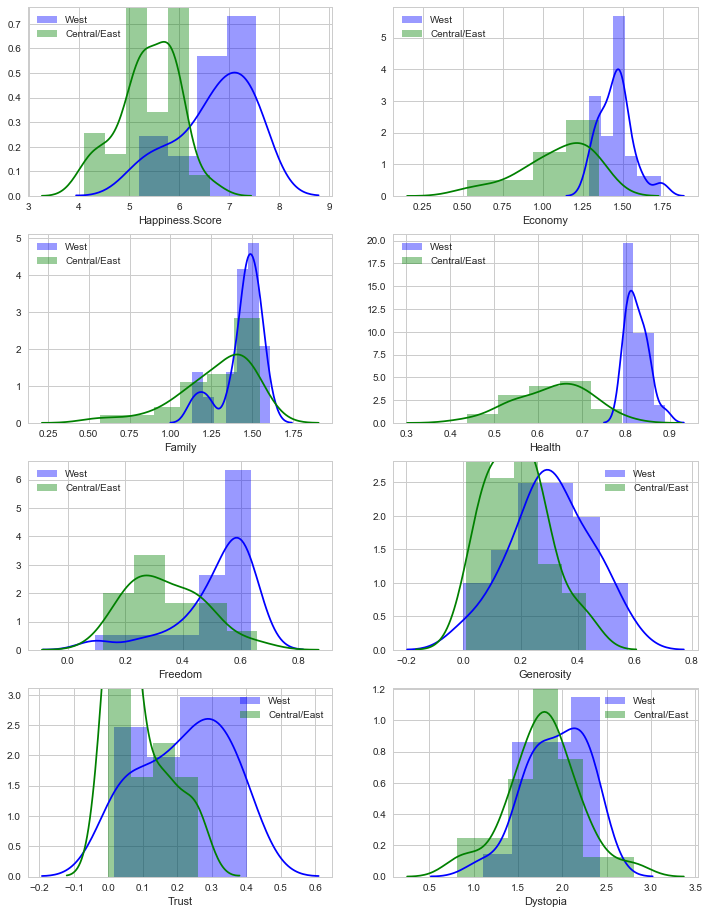

In [16]:
f, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()
compareCols = ['Happiness.Score','Economy','Family','Health','Freedom','Generosity', 'Trust','Dystopia']
for i in range(len(compareCols)):
    col = compareCols[i]
    axi = axes[i]
    sns.distplot(w_europe[col],color='blue' , label='West', ax=axi)
    sns.distplot(ec_europe[col],color='green', label='Central/East',ax=axi)
    axi.legend()

In [17]:
# Economy = GDP per Capital, Health = Life Expectancy, Trust = Government Corruption 
# the graph above showed the 8 factors of these two regions.
# economy,family,health and freedom are quiet similar

#### Asia

In [18]:
s_asia = df[df.Region=='Southern Asia']
e_asia = df[df.Region=='Eastern Asia']
se_asia = df[df.Region=='Southeastern Asia']

asia = pd.concat([s_asia, e_asia, se_asia],axis=0)
asia.head()

,Country,Region,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy,Family,Health,Freedom,Generosity,Trust,Dystopia
78,Pakistan,Southern Asia,80,5.269,5.359984,5.178016,0.726884,0.672691,0.402048,0.235215,0.315446,0.124348,2.792489
95,Bhutan,Southern Asia,97,5.011,5.079335,4.942666,0.885416,1.340127,0.495879,0.501538,0.474055,0.173380,1.140184
97,Nepal,Southern Asia,99,4.962,5.067356,4.856644,0.479820,1.179283,0.504131,0.440306,0.394096,0.072976,1.891241
108,Bangladesh,Southern Asia,110,4.608,4.689822,4.526178,0.586683,0.735132,0.533241,0.478357,0.172255,0.123718,1.978736
117,Sri Lanka,Southern Asia,120,4.440,4.553447,4.326553,1.009850,1.259976,0.625131,0.561213,0.490864,0.073654,0.419389


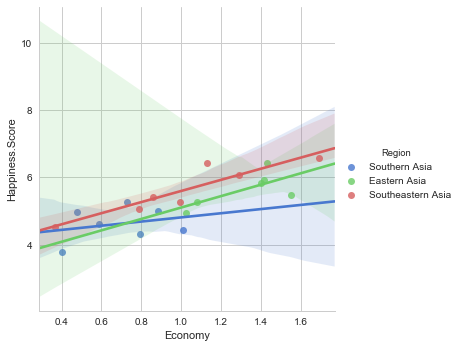

In [19]:
plt.figure(figsize=(12,8))
sns.lmplot(data=asia, x='Economy', y='Happiness.Score', hue="Region")
plt.show()

In [20]:
# the blue dote represent countries in Southern Asia
# two parts of Asia is quiet similar(Southerneast Asia ane Eastern Asia),
# especially, southeastern Asia has the best economy situation
# Southern Asia countries is less happier

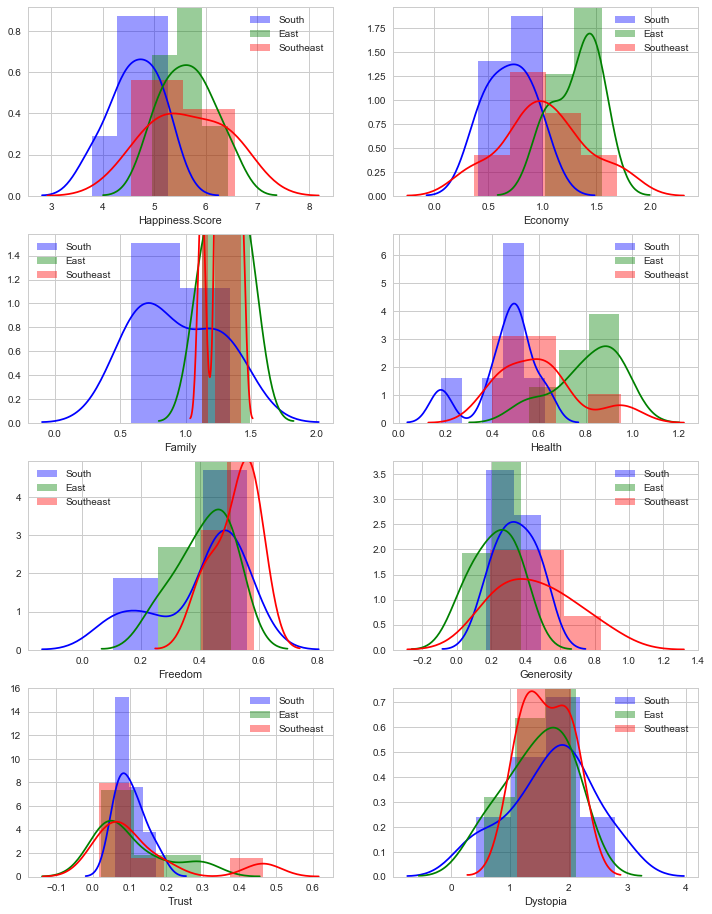

In [21]:
f, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()
compareCols = ['Happiness.Score','Economy','Family','Health','Freedom','Generosity', 'Trust','Dystopia']
for i in range(len(compareCols)):
    col = compareCols[i]
    axi = axes[i]
    sns.distplot(s_asia[col],color='blue' , label='South', ax=axi)
    sns.distplot(e_asia[col],color='green', label='East',ax=axi)
    sns.distplot(se_asia[col],color='red', label='Southeast',ax=axi)
    axi.legend()

In [22]:
# Economy = GDP per Capital, Health = Life Expectancy, Trust = Government Corruption 
# the graph above showed the 8 factors of these two regions.
# economy and the happiness score is similar
# maybe this is because economy will influence the happiness index 
# HOW ABOUT DIFFERENT COUNTRIES?

### country

In [23]:
# TOP 15 COUNTRIES 

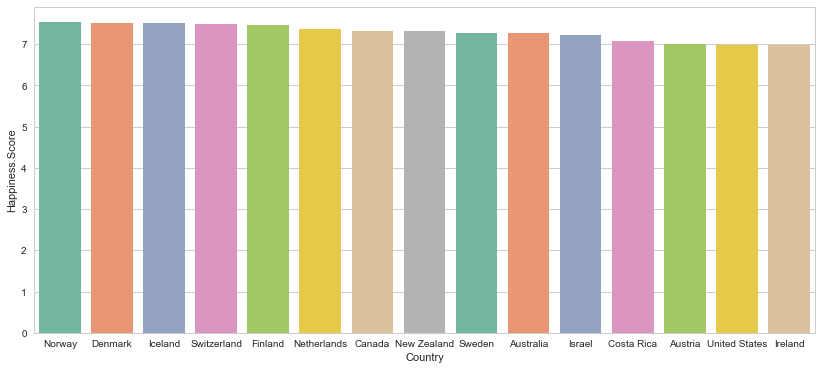

In [24]:
plt.figure(figsize=(14,6))
topCountry=df.sort_values(by=['Happiness.Rank'],ascending=True).head(15)
ax=sns.barplot(x='Country',y='Happiness.Score', data=topCountry, palette = 'Set2')
ax.set(xlabel='Country', ylabel='Happiness.Score')

In [25]:
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness.Rank'], 
           text = df['Country'],
           colorscale = [[0,"rgb(255, 69, 0)"],[0.35,"rgb(255, 99, 71)"],[0.5,"rgb(255, 127, 80)"],
            [0.6,"rgb(255, 165, 0)"],[0.7,"rgb(255, 215, 0)"],[1,"rgb(255, 255, 0)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(120,120,120)',
                width = 0.5
            ) ),
           colorbar = {'title':'Happiness<br>Rank'})
layout = dict(title = 'Global Happiness in 2017', 
              geo = dict(showframe = False, 
                        showcoastlines = False,
                       projection = {'type': 'Mercator'}))
choromap17 = go.Figure(data = [data], layout=layout)
iplot(choromap17)


In [52]:
# if this graph cannot appear, you can open in the jupyter notebook

### DIFFERENT FACTORS

###### Compared from economy, family, health, freedom, generosity, trust and dystopia

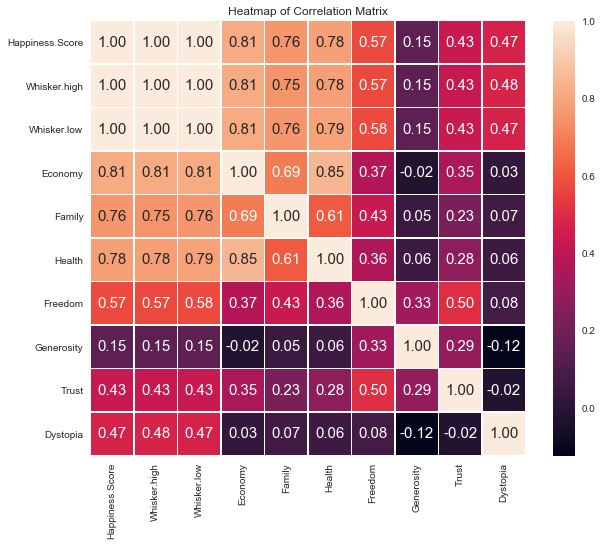

In [27]:
plt.subplots(figsize=(10,8))
corr = df.drop(['Country','Region','Happiness.Rank'],axis = 1).corr()
sns.heatmap(corr, cbar = True, square=True, annot=True, linewidths = .5,  fmt='.2f',annot_kws={'size': 15} )
plt. title('Heatmap of Correlation Matrix')
plt.show()

In [28]:
# from this graph, Generosity has the weakest link with happiness score
# Economy has the stroungest link with happiness score
# Happiness Score is strongly correlated with Economy, Family & Health

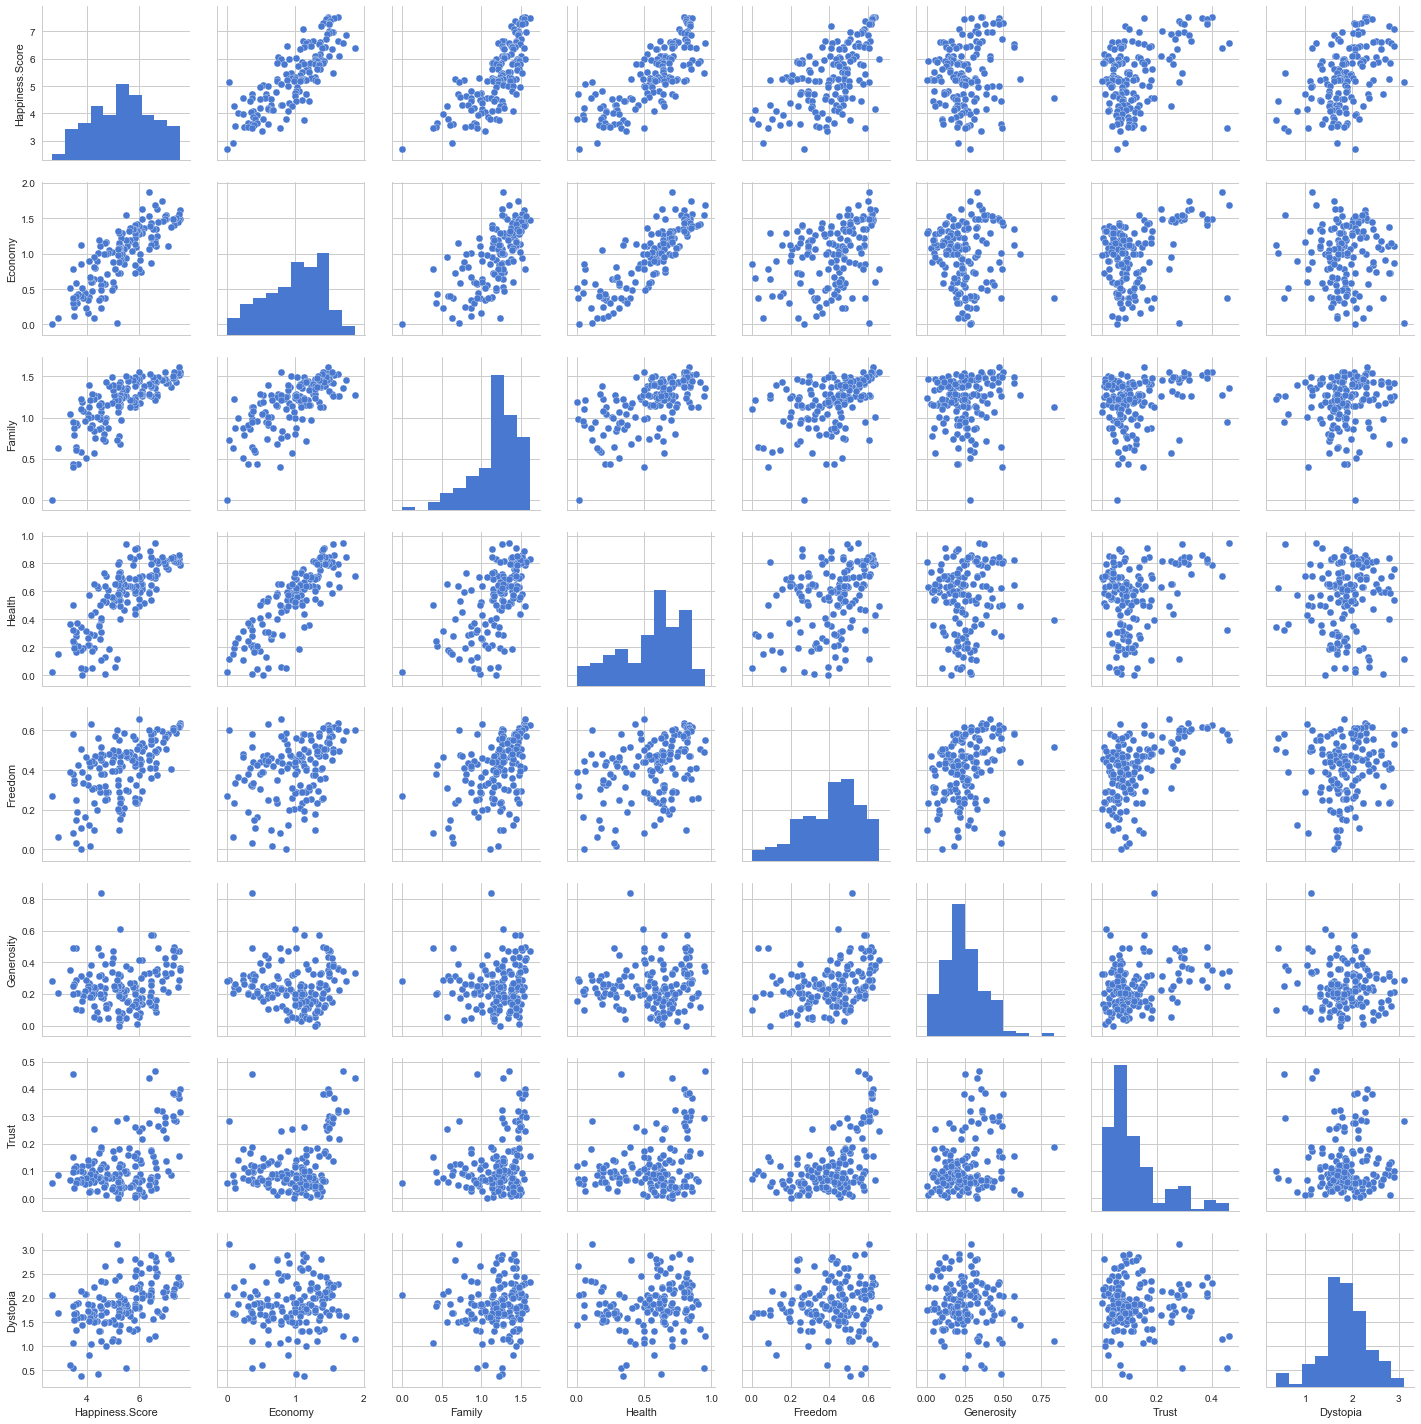

In [29]:
sns.pairplot(data = df.drop(['Country', 'Region', 'Happiness.Rank','Whisker.high', 'Whisker.low'], axis = 1))

In [30]:
# plot for Happiness Score vs all factors to judge if Family and generosity play major role in 2017
# which graph is more like a line will more influence the happiness score 
# so economy plays a major role in 2017

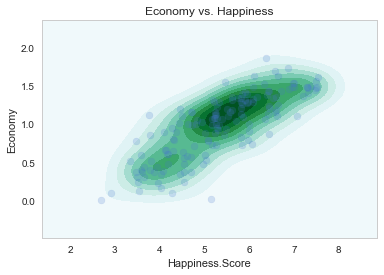

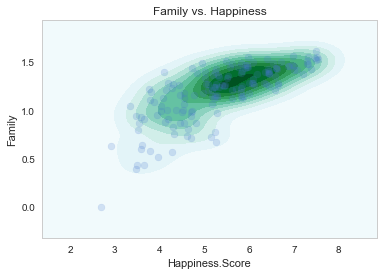

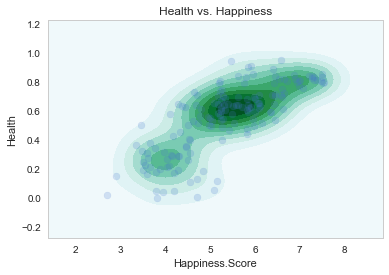

In [31]:
sns.kdeplot(df['Happiness.Score'], df['Economy'], shade=True)
plt.scatter(df['Happiness.Score'], df['Economy'], alpha=0.2,)
plt.xlabel('Happiness.Score')
plt.ylabel('Economy')
plt.title('Economy vs. Happiness')
plt.show()


sns.kdeplot(df['Happiness.Score'], df['Family'], shade=True)
plt.scatter(df['Happiness.Score'], df['Family'], alpha=0.2,)
plt.xlabel('Happiness.Score')
plt.ylabel('Family')
plt.title('Family vs. Happiness')
plt.show()


sns.kdeplot(df['Happiness.Score'], df['Health'], shade=True)
plt.scatter(df['Happiness.Score'], df['Health'], alpha=0.2,)
plt.xlabel('Happiness.Score')
plt.ylabel('Health')
plt.title('Health vs. Happiness')
plt.show()

In [32]:
# economy, family and health all influence the happiness score
# among these three factors, the economy is most importment

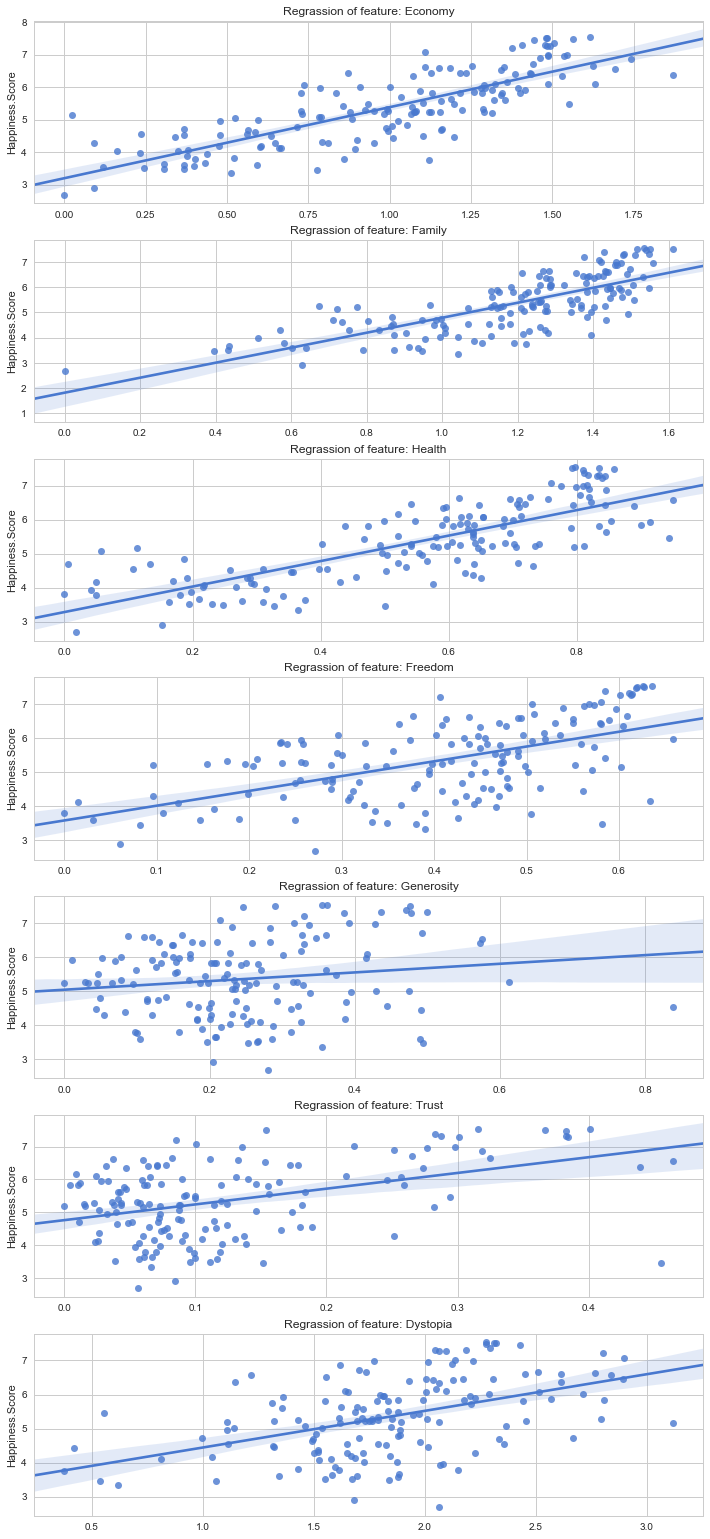

In [33]:
cols = ['Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Trust', 'Dystopia']
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(cols):
    ax = plt.subplot(gs[i])
    #sns.distplot(df1[cn], bins=50)
    sns.regplot(x=df[cn],y='Happiness.Score' ,data=df)
    ax.set_xlabel('')
    ax.set_title('Regrassion of feature: ' + str(cn))
plt.show()

In [34]:
# the last three images revealed that Generosity, Trust and Dystopia less impacted happiness score ,cause the dot scattered separatly
# the first four images showed an opposite view, cause the dot on it looks like a line

In [35]:
dff = pd.read_csv("20173.csv")

In [36]:
X2017 = dff.iloc[:,5:]
y2017 =dff['Happiness.Score']
X2017.head()

,Economy,Family,Health,Freedom,Generosity,Trust,Dystopia
0,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


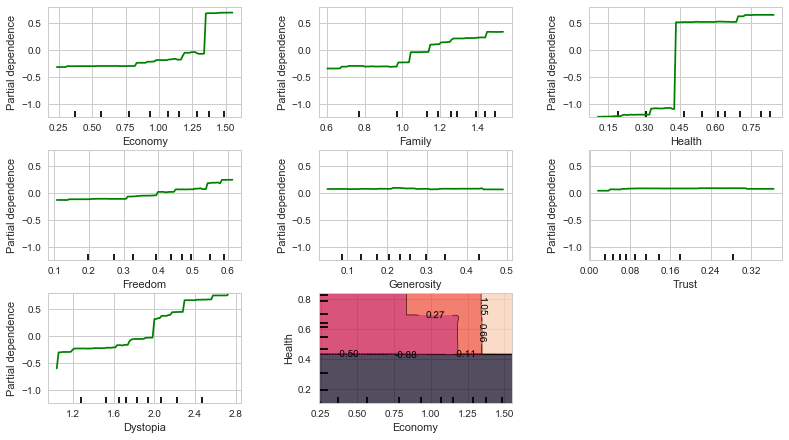

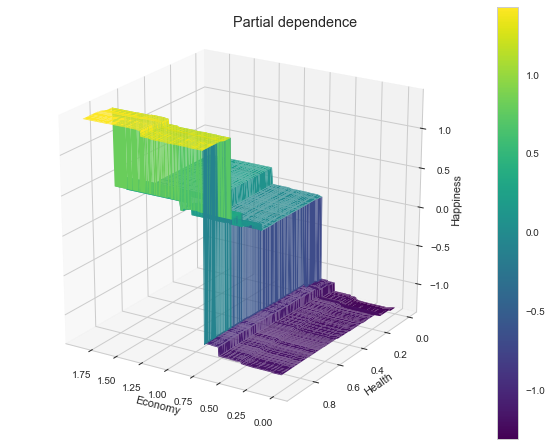

In [37]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
from mpl_toolkits.mplot3d import Axes3D
names = X2017.columns
clf = GradientBoostingRegressor(n_estimators=1000, max_depth=10,
                                    learning_rate=0.1, loss='huber',
                                    random_state=42)
clf.fit(X2017, y2017)
features = [0, 1, 2, 3,4,5,6,(0, 2)]
fig, axs = plot_partial_dependence(clf, X2017, features,
                                       feature_names=names,
                                       n_jobs=3 ,grid_resolution=100, figsize = (12,10))



fig = plt.figure(figsize=(8,6))
target_feature = (0, 2)
pdp, axes = partial_dependence(clf, target_feature,
                                  X=X2017, grid_resolution=1000)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes)))
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap = plt.get_cmap('viridis') )
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Happiness')
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence')
plt.subplots_adjust(top=0.9)
plt.show()


In [38]:
# this graph showed the same imformation in 3D.
#different economy and health of each country will has different partial dependence

### PREDICTION OF 2018

In [39]:
# use data from passed years, we can also find some regular parttern
df = pd.read_csv("2017.csv")

In [40]:
X = df.drop(['Happiness.Score', 'Happiness.Rank', 'Country', 'Region'], axis=1)
y = df['Happiness.Score']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print('Standardized features\n')
print(str(X_train[:4]))

Standardized features

[[-1.11291808 -1.06586815 -0.17197991  0.7010837   0.15538049 -1.73302634
   0.1422353  -1.03882006 -2.11263355]
 [-0.13985985 -0.12834925  0.03547785 -0.42890613  0.68542741 -1.2249762
   0.55541942 -1.29380363  0.04682716]
 [ 1.77881912  1.81325608  1.26838177  0.82062037  1.11800889  1.15205204
   1.5504891   1.83584372  0.85353973]
 [ 1.40237396  1.44039463  1.2305077   0.97205328  1.06985376  1.00934159
   0.60742522  1.77018768  0.29446689]]


In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [44]:
result_lm = pd.DataFrame({
    'Actual':y_test,
    'Predict':y_pred
})
result_lm['Diff'] = y_test - y_pred
result_lm.head()

,Actual,Predict,Diff
68,5.493,5.493,6.126175e-10
78,5.269,5.269,-1.935492e-10
20,6.648,6.648,-4.489387e-10
16,6.891,6.891,3.512213e-11
150,3.349,3.349,2.806759e-10


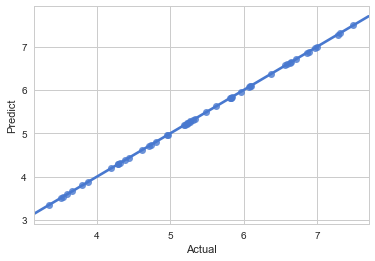

In [45]:
sns.regplot(x='Actual',y='Predict',data=result_lm)

In [46]:
# Setted up Linear Model to predict

In [47]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.98038613397e-10
MSE: 1.40760283756e-19
RMSE: 3.7518033498e-10


In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [49]:
result_rf = pd.DataFrame({
    'Actual':y_test,
    'Predict':y_pred
})
result_rf['Diff'] = y_test - y_pred
result_rf.head()

,Actual,Predict,Diff
68,5.493,5.4830,0.0100
78,5.269,5.2491,0.0199
20,6.648,6.5427,0.1053
16,6.891,7.0730,-0.1820
150,3.349,3.6121,-0.2631


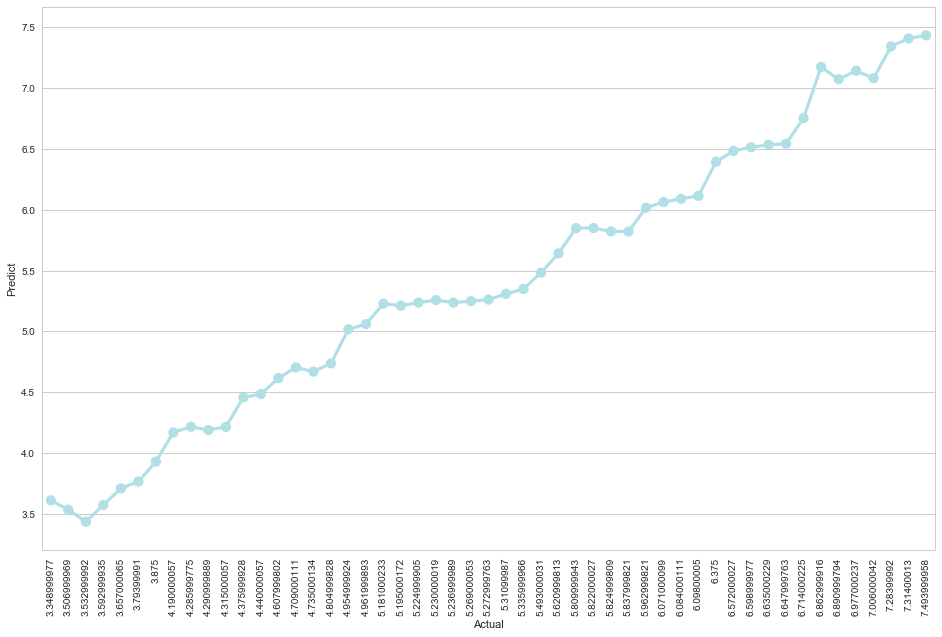

In [50]:
plt.figure (figsize = (16, 10))
sns.pointplot(x='Actual',y='Predict',data=result_rf, dodge = True, color="powderblue")
plt.xticks(rotation = 90)
plt.show()

### CONCLUSION

In [51]:
# 1.Happiness Ranking basically depends on Economy. Countries having strong GDP rate are happiest countries indeed. 
# 2.Happiness score also depends on family, health, freedom and trust.
# 3.Genesrosity has no remarkable impact on Happiness score.